In [1]:
import numpy as np
from qiskit.circuit import Delay
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
import warnings
from qiskit.primitives import StatevectorSampler

import sys
import os

# Add "../../.." to the sys.path to use SteaneCodeCircuit class
sys.path.append(os.path.abspath("../../.."))
sys.path.append(os.path.abspath(".."))
from objects.steane_code_circuit import SteaneCodeCircuit
from functions.transpile import get_layout
from utils import get_transpile, TVD, load_experiment, run_experiment


In [2]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)

In [3]:
# Select backend
backend_name = 'ibm_sherbrooke'
backend = service.backend(backend_name)
sampler = SamplerV2(backend)
shots = 2500

In [4]:
# Get the dt of the selected backend in nano seconds
print(f" > dt in seconds: {backend.configuration().dt} s")
dt = backend.configuration().dt * 10**9
print(f" > dt in ns: {round(dt, 3)} ns")

 > dt in seconds: 2.2222222222222221e-10 s
 > dt in ns: 0.222 ns


In [5]:
t_array = [t*9_000 for t in range(0, 6)]
print(f" > Delays in dt: {t_array}")
print(f" > Delays un us: {[round(t*dt * 10**(-3) , 3) for t in t_array]}")

 > Delays in dt: [0, 9000, 18000, 27000, 36000, 45000]
 > Delays un us: [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]


In [6]:
state = '+'
basis = 'x'
error_correction = False
initial_layout = [62, 72, 61, 63, 60, 81, 59, 53]
circuits, qc_circuits, initial_layout = load_experiment(state, basis, error_correction, backend, t_array=t_array, initial_layout=initial_layout)

 > dt in seconds: 2.2222222222222221e-10 s
 > dt in ns: 0.222 ns
 > Initial layout: [62, 72, 61, 63, 60, 81, 59, 53]
 > Delays in dt: [0, 9000, 18000, 27000, 36000, 45000]
 > Delays un us: [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]
Circuit Depth: 180
Delay Duration: 0.0 us
Estimated Total Duration: 28.004 us

Circuit Depth: 183
Delay Duration: 2.0 us
Estimated Total Duration: 34.009 us

Circuit Depth: 183
Delay Duration: 4.0 us
Estimated Total Duration: 40.004 us

Circuit Depth: 183
Delay Duration: 6.0 us
Estimated Total Duration: 46.009 us

Circuit Depth: 183
Delay Duration: 8.0 us
Estimated Total Duration: 52.004 us

Circuit Depth: 183
Delay Duration: 10.0 us
Estimated Total Duration: 58.009 us



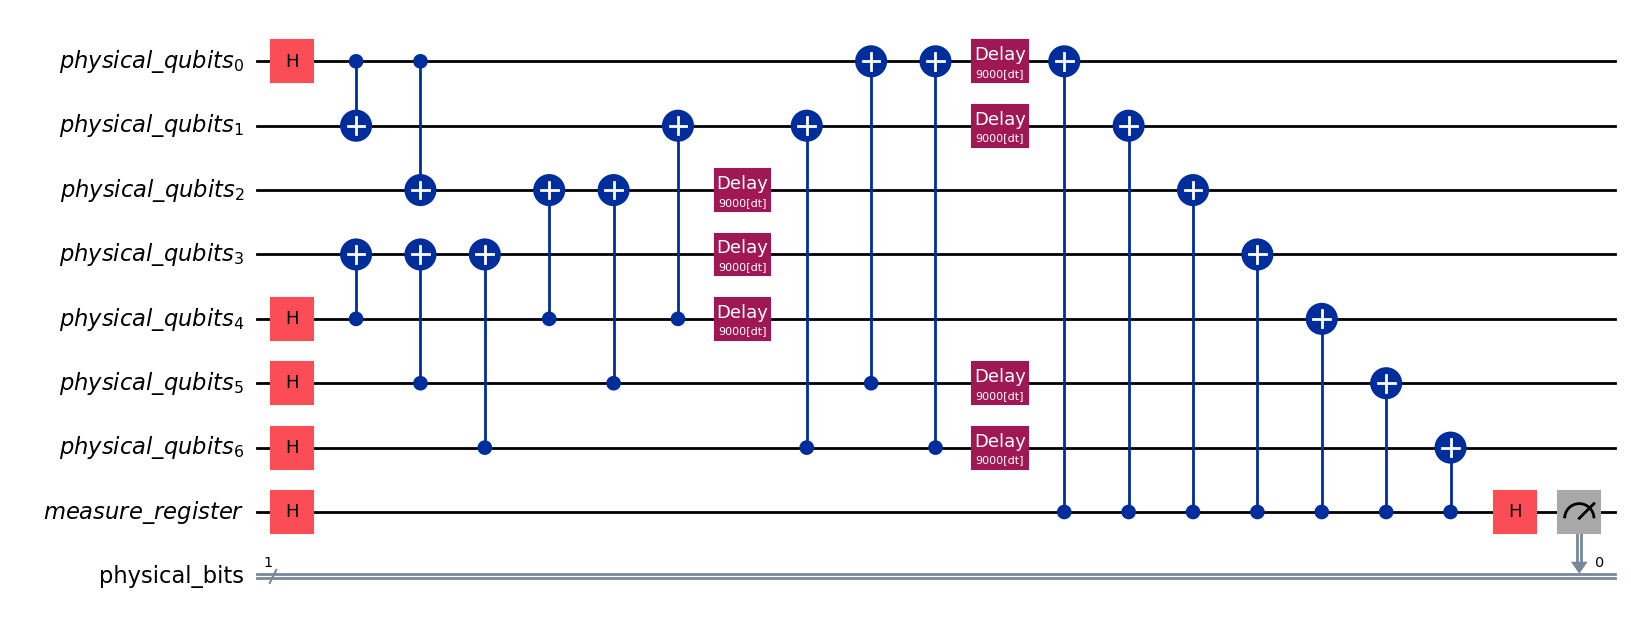

In [8]:
qc_circuits[1].draw("mpl")

In [10]:
json_file = os.path.abspath("experiments.json")
experiment_name = 'delay_measureXL_noCorrection'
shots = 2500

In [11]:
run_experiment(json_file, experiment_name, circuits, shots, sampler, {'0': 1}, initial_layout, t_array=t_array, printing=True)

 > job_id: cysmc6g78z600082dwfg
 > job_status: QUEUED


{'delay_measureAll_noCorrection': [{'job_id': 'cyrmmkj26abg008eh730',
   'metadata': {'expected_distribution': {'0000000': 0.125,
     '0001111': 0.125,
     '0110011': 0.125,
     '0111100': 0.125,
     '1010101': 0.125,
     '1011010': 0.125,
     '1100110': 0.125,
     '1101001': 0.125},
    't_array': [0, 9000, 18000, 27000, 36000, 45000],
    'initial_layout': [100, 110, 101, 99, 118, 119, 120]}},
  {'job_id': 'cys3dqpy9d80008d62e0',
   'metadata': {'expected_distribution': {'0000000': 0.125,
     '0001111': 0.125,
     '0110011': 0.125,
     '0111100': 0.125,
     '1010101': 0.125,
     '1011010': 0.125,
     '1100110': 0.125,
     '1101001': 0.125},
    't_array': [0, 9000, 18000, 27000, 36000, 45000],
    'initial_layout': [100, 110, 101, 99, 118, 119, 120]}}],
 'delay_measureZL_noCorrection': [{'job_id': 'cyrcd741j2e0008twbmg',
   'metadata': {'expected_distribution': {'0': 1},
    't_array': [0, 9000, 18000, 27000, 36000, 45000],
    'initial_layout': [62, 61, 63, 72, 64, 60,